# Lending club case study
## High level approach 
- Understand the data 
- Import the data and analyse the data 
- Perform data clean up 
- Univariate analysis 
- Observations
- BiVariate analysis 
- Observations

In [279]:
# Importing all the python libraries here
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [280]:
# Load the csv file from disk
loan = pd.read_csv('loan.csv', low_memory=False)

In [281]:
## Describe and have a high level view of dataframe loaded 
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

# Data clean up 

### We will not need all columns which has only NAN value as it is does not have impact on the analysis

In [282]:
# drop all columns with NAN values 
loan.dropna(axis=1, how='all', inplace=True)

### We are not done yet, we will be further looking at other columns with more proportion of NAN value and try to eliminiate them

#### Further looking at the other columns we will try to understand if we have same values across the columns and eliminate such columns 

In [283]:
# Converting the object type to String to check unique values in the column
loan.pymnt_plan = loan['pymnt_plan'].astype('string')

In [284]:
# using unique to check value sets present in the column 
loan.pymnt_plan.unique()

<StringArray>
['n']
Length: 1, dtype: string

In [285]:
# using unique to check value sets present in the column 
loan.application_type.unique()

array(['INDIVIDUAL'], dtype=object)

In [286]:
# using unique to check value sets present in the column 
loan.delinq_amnt.unique()

array([0], dtype=int64)

In [287]:
# using unique to check value sets present in the column 
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [288]:
# using unique to check value sets present in the column 
loan.acc_now_delinq.unique()

array([0], dtype=int64)

In [289]:
# using unique to check value sets present in the column 
loan.policy_code.unique()

array([1], dtype=int64)

In [290]:
# using unique to check value sets present in the column 
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [291]:
# pub_rec_bankruptcies has predominantly zeroes and hence we can eliminate that coulumn too 
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [292]:
# only 2% of ros only has next scheduled date value hence we can eliminate this too 
loan.next_pymnt_d.value_counts()

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

In [293]:
# There is no charge off within 12 months 
loan.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [294]:
# unique policy code across dataframe
loan.policy_code.value_counts()

1    39717
Name: policy_code, dtype: int64

In [295]:
# pub_rec is predominantly filled in by zeroes hence we can eliminate
loan.pub_rec.value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [296]:
loan.recoveries.value_counts()

0.00       35499
11.29          4
10.40          4
10.66          3
44.92          3
           ...  
764.69         1
653.08         1
1080.96        1
878.19         1
21.29          1
Name: recoveries, Length: 4040, dtype: int64

In [297]:
# title consists of random values
loan.title.value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [298]:
# majority are zeroes hence we can eliminate this column
loan.total_rec_late_fee.value_counts()

0.000000     37671
15.000000      255
15.000000       58
30.000000       55
15.000000       47
             ...  
35.286832        1
15.000000        1
14.777500        1
14.967774        1
19.890000        1
Name: total_rec_late_fee, Length: 1356, dtype: int64

In [299]:
# we can eliminate as this is a unique url for the loan id which we already has in id column 
loan.url.value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785630     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785626     1
https://lendingclub.com/browse/loanDetail.action?loan_id=87023      1
Name: url, Length: 39717, dtype: int64

In [300]:
# This is a public data hence we can eliminate this coulmn
loan.zip_code.value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64

In [301]:
# Dropping the above analysed column and the reason is mentioned in the respective code block itself for clarity
loan.drop(['pymnt_plan', 'application_type', 'delinq_amnt', 'chargeoff_within_12_mths', 
         'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med', 'tax_liens', 'initial_list_status', 
         'pub_rec_bankruptcies', 'next_pymnt_d', 'chargeoff_within_12_mths', 'policy_code', 'pub_rec',
         'recoveries', 'title', 'total_rec_late_fee', 'url', 'zip_code'], 
         axis=1, inplace=True)

### Standardising numbers
#### There could be data which is is eligible to be a number but marked as object columns due to numerical representations such as percentage %, greater > , lesser <, etc.. 
#### we will try to look up such data and try to correct them into number format

In [302]:
# Replace all % values in interest rate columns and convert it to float type
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.replace('%', '')))

In [303]:
#Replace all employee_length String to int values
loan["emp_length"] = loan["emp_length"].str.replace("\+ years","").str.replace("< 1 year","0").str.replace("years","").str.replace("year","")
loan["emp_length"] = loan["emp_length"].astype('Int32')
loan["emp_length"]

C:\Users\sivaskandan\AppData\Local\Temp\ipykernel_12112\1513239879.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  loan["emp_length"] = loan["emp_length"].str.replace("\+ years","").str.replace("< 1 year","0").str.replace("years","").str.replace("year","")


0        10
1         0
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 39717, dtype: Int32

In [304]:
#converting grade and subgrade column to string
loan['grade'] = loan['grade'].astype('string')
loan['sub_grade'] = loan['sub_grade'].astype('string')

In [305]:
#Analysing the GRADE and SUBGRADE column
loan['grade_and_subgrade']=loan.apply(lambda x : True if x['grade'] == x['sub_grade'][0] else False,axis=1)

In [306]:
#The grade is added as a first character in subgrade
loan['grade_and_subgrade'].value_counts()

True    39717
Name: grade_and_subgrade, dtype: int64

In [307]:
#droping the temproary column grade_and_subgrade which we created for previous analysis since it will not be needed further.
loan = loan.drop(columns = 'grade_and_subgrade')

In [308]:
#Hence removing the first character of sub_grade 
loan['sub_grade'] = loan['sub_grade'].apply(lambda x : x[1]) 

In [309]:
#The term column has Months string in every record removing that and updating column name to term months
loan['term'] = loan['term'].apply(lambda x: int(x.split()[0]))


In [310]:
#desc column as some text which will be not usefull in analysis so removing the column
loan.drop(columns = 'desc',inplace= True)

In [311]:
loan.isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_

In [312]:
#emp_length has 1075 NA values
loan.emp_length.isna().sum()

1075

In [313]:
#Analysing the emp_length field
print("Mode : " + str(loan.emp_length.mode()[0]))
print("Mean : " + str(loan.emp_length.mean()))
loan.emp_length.value_counts()


Mode : 10
Mean : 4.973448579266083


10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: Int64

In [314]:
#We could see the mode value as more occurences than the mean value. So mode will be the optimum solution to fill na values
loan.emp_length.fillna(loan.emp_length.mode()[0],inplace=True)
loan.emp_length.isna().sum()

0

In [315]:
loan.revol_util.isna().sum()

50

In [316]:
#removing the % in revol_util field at end
loan.revol_util = loan.revol_util.astype('string')
loan.revol_util = loan.revol_util.apply(lambda x: float(x[:-1]) if not pd.isna(x) else x)


In [317]:
print("Mode :" + str(loan.revol_util.mode())[0])
print("Mean :" + str(loan.revol_util.mean()))
loan.revol_util.value_counts()

Mode :0
Mean :48.83215241888721


0.00     977
0.20      63
63.00     62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: revol_util, Length: 1089, dtype: int64

In [318]:
#Analysing above mean and mode values. We could infer that the mode 0.00 is be repeated more than mean value.
loan.revol_util.fillna(loan.revol_util.mode()[0],inplace=True)

In [319]:
loan.revol_util.isna().sum()

0

In [322]:
#Droping mths_since_last_delinq, mths_since_last_record columns since they have NA columns more 50% of the rows
loan.drop(columns=['mths_since_last_delinq', 'mths_since_last_record'],inplace = True )

In [326]:
loan.emp_title.value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [323]:
loan.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_re

# Univariate analysis

In [27]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

### Unordered categorical
#### Frequency Chart for loan status variable

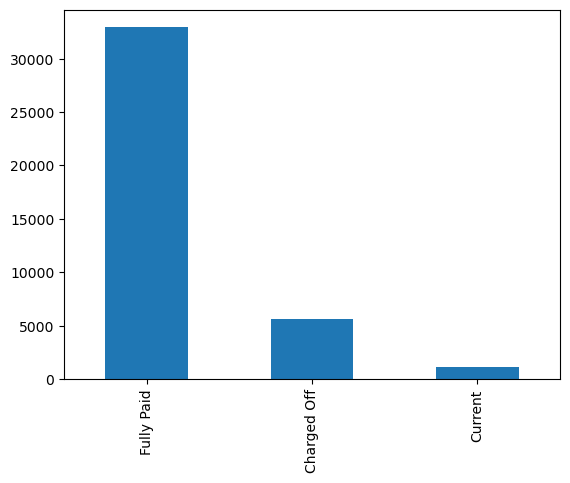

In [28]:
loan['loan_status'].value_counts().plot.bar()
plt.show()

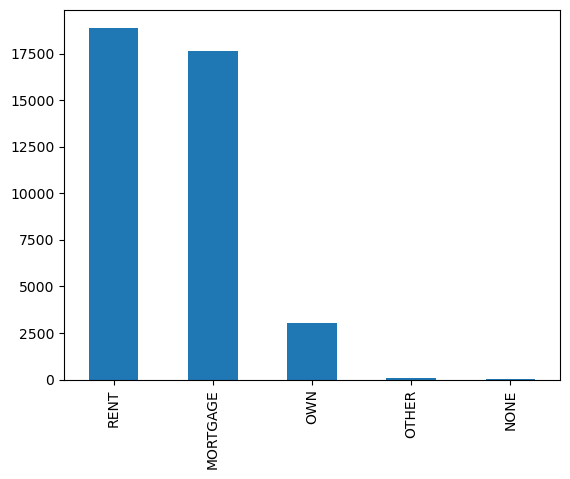

In [29]:
loan['home_ownership'].value_counts().plot.bar()
plt.show()

### Ordered categorical
#### Employee length of working years will be in order from 0 to 10 hence understanding the frequency would give us some insights of loan candidates

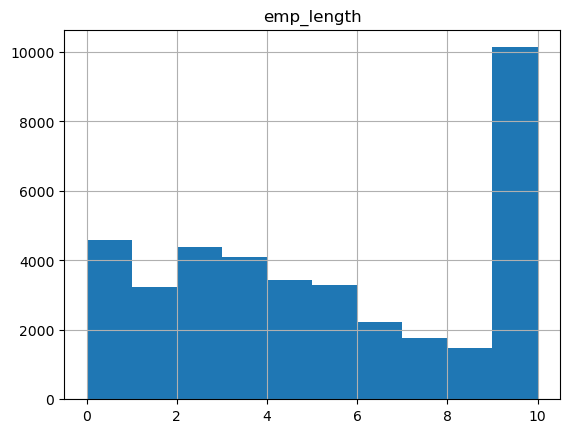

In [30]:
loan.hist(column='emp_length', bins=10)
plt.show()

### Quantitative variables

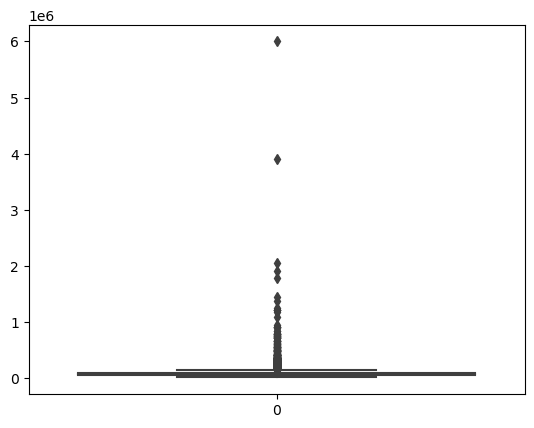

In [31]:
#Create a box plot for the price column
sns.boxplot(loan['annual_inc'])
plt.show()

In [32]:
loan_quantile_75 = loan[loan['loan_amnt'] >= loan['loan_amnt'].quantile(0.50)]
sns.boxplot(loan_quantile_75['loan_amnt'])
plt.show()

KeyError: 0

In [ ]:
sns.barplot(x = 'loan_amnt',
            y = 'dti',
#             hue = 'home_ownership',
            data = loan)
 
# Show the plot
plt.show()